In [1]:
import csv
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tols = []
with open('tolerance_2.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)
    for row in csv_reader:
        tols.append([float(r) for r in row])

In [3]:
header

['repetition',
 'tolerance',
 'buffer_capacity_1',
 'buffer_capacity_2',
 'lambda_1_1',
 'lambda_1_2',
 'lambda_2',
 'mu_1',
 'mu_2',
 'num_of_servers_1',
 'num_of_servers_2',
 'system_capacity_1',
 'system_capacity_2',
 'threshold_1',
 'threshold_2',
 'time_taken']

In [4]:
data = np.array(tols)

In [5]:
df = pd.DataFrame(data, columns=header)

In [6]:
def find_specific_rows_in_data(data, parameters, start=1, end=-1):
    sample = []
    for row in data:
        if list(row[start:end]) == parameters:
            sample.append(row)
    return np.array(sample)

In [7]:
def find_rows_with_specific_tolerance(data, tolerance):
    sample = []
    for row in data:
        if row[1] == tolerance:
            sample.append(row)
    return np.array(sample)

# Specific parameter sets

In [8]:
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [9]:
parameters = [10,10,2,2,5,3,2,3,4,7,15,7,10]

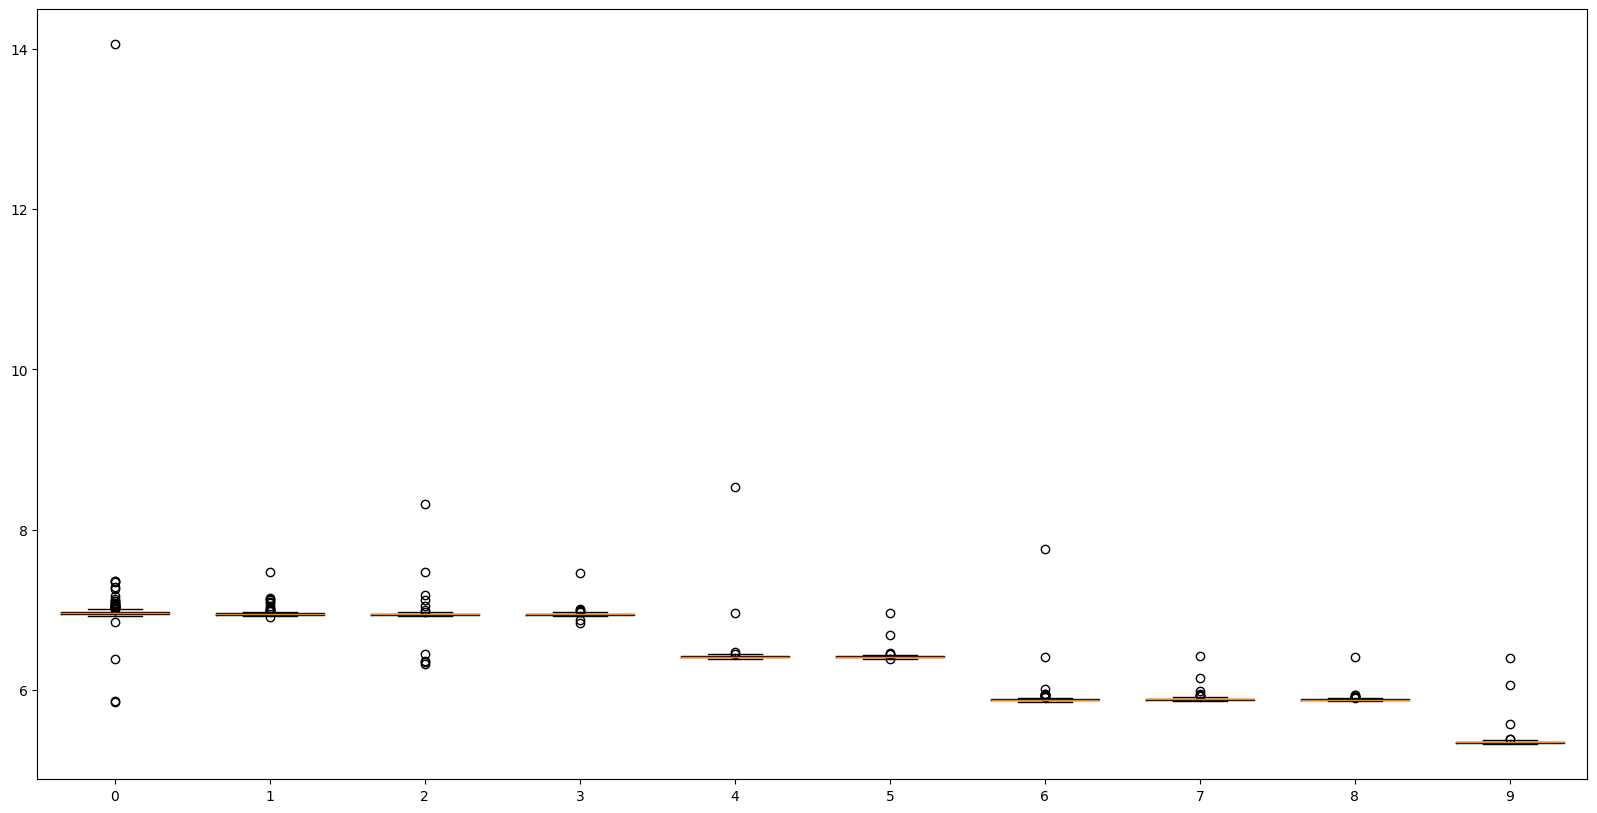

In [10]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

In [11]:
parameters = [10,10,2,2,5,3,2,3,4,8,15,7,10]

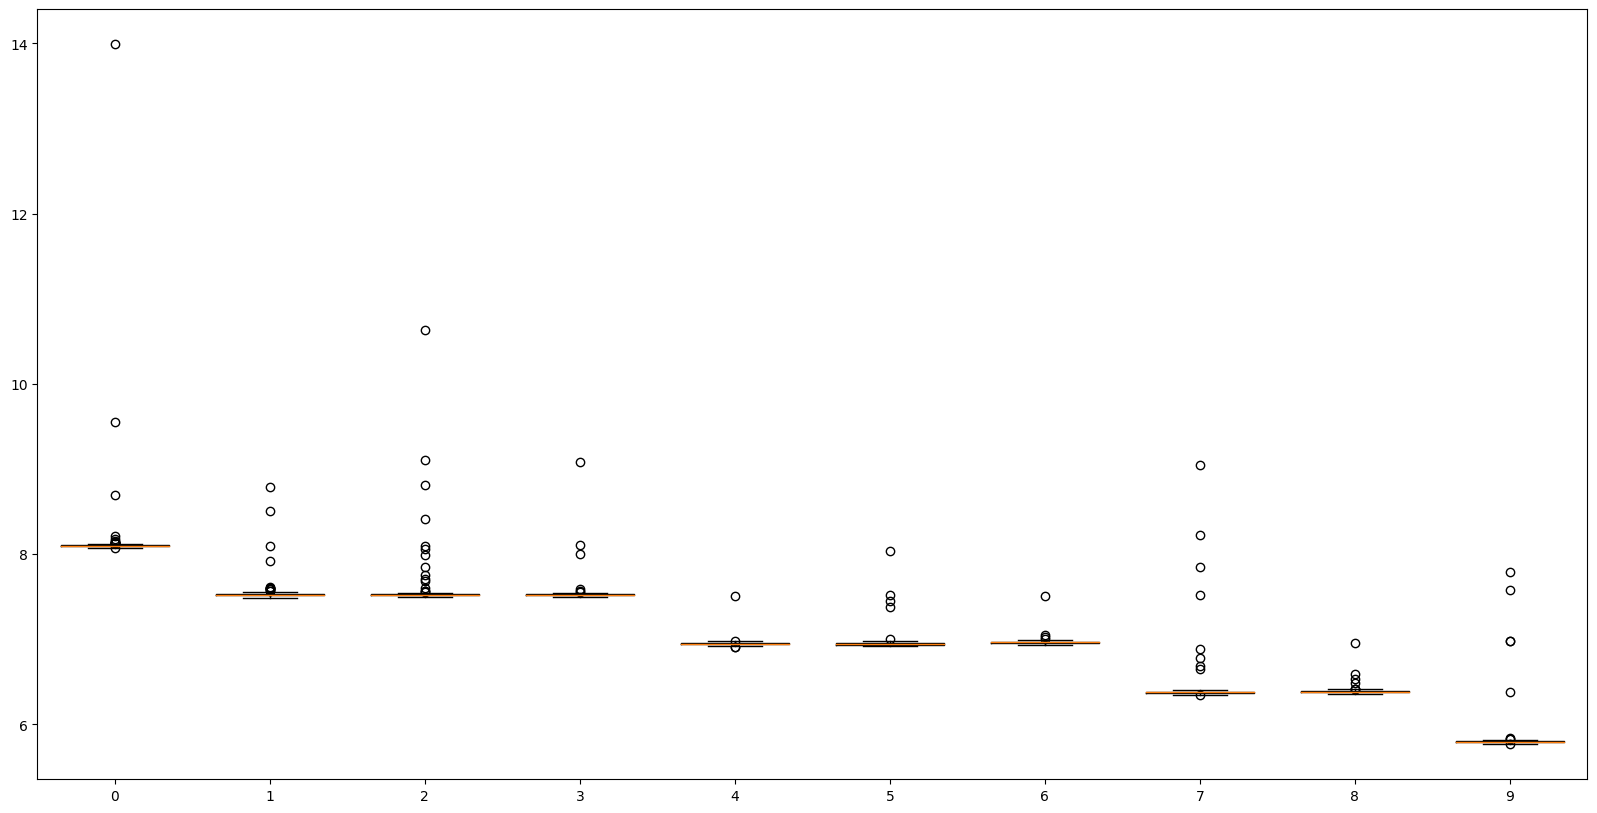

In [12]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

In [13]:
parameters = [10,10,2,2,5,3,2,3,4,17,15,7,10]

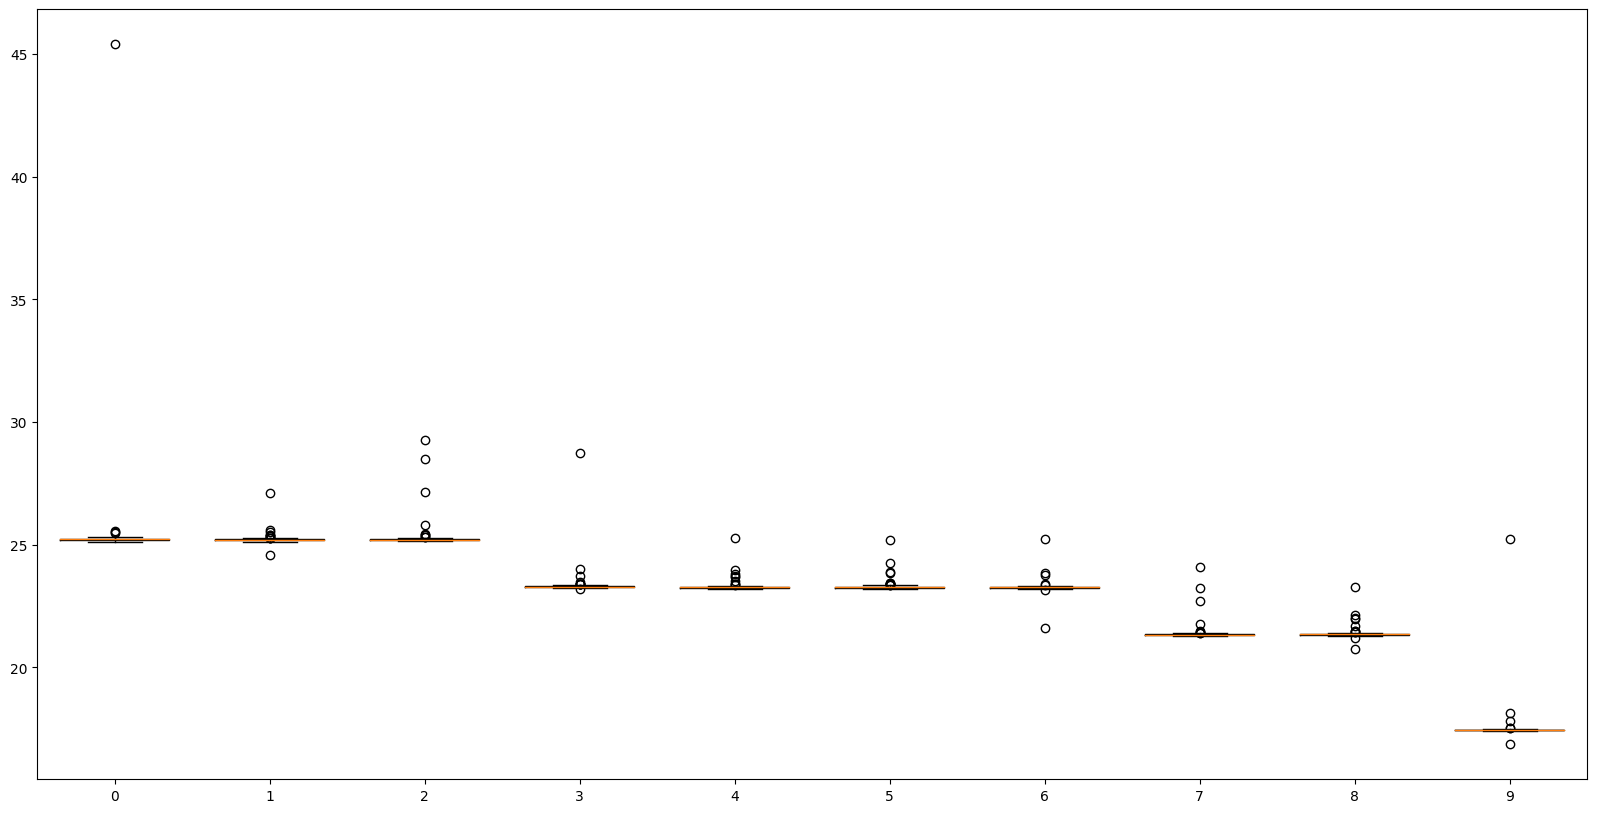

In [14]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

In [15]:
parameters = [10,10,2,2,5,3,2,3,4,23,15,7,10]

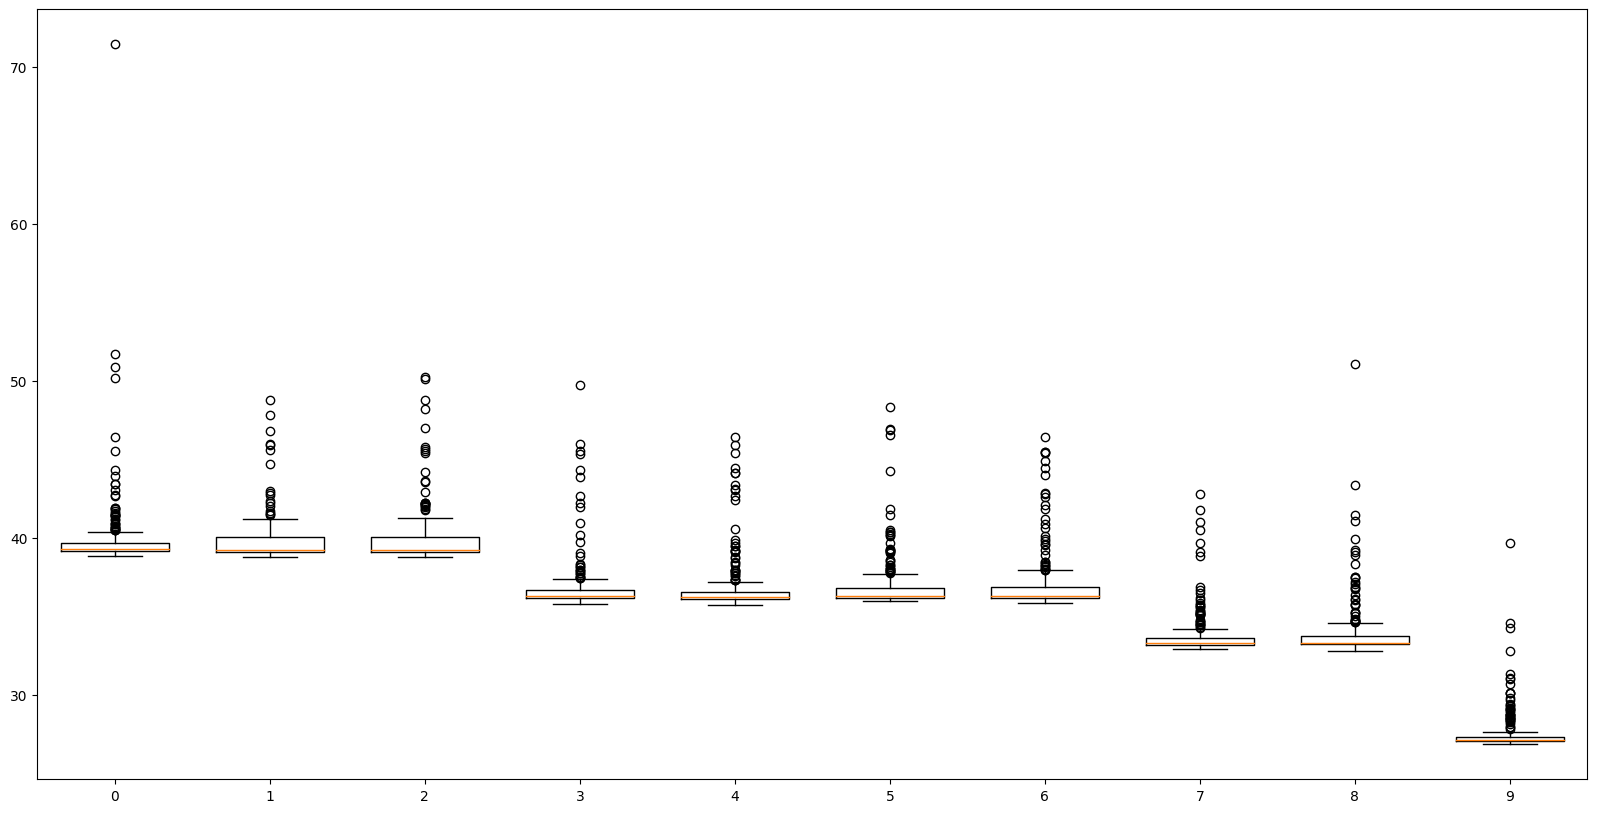

In [16]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

# All data per tolerance

In [17]:
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

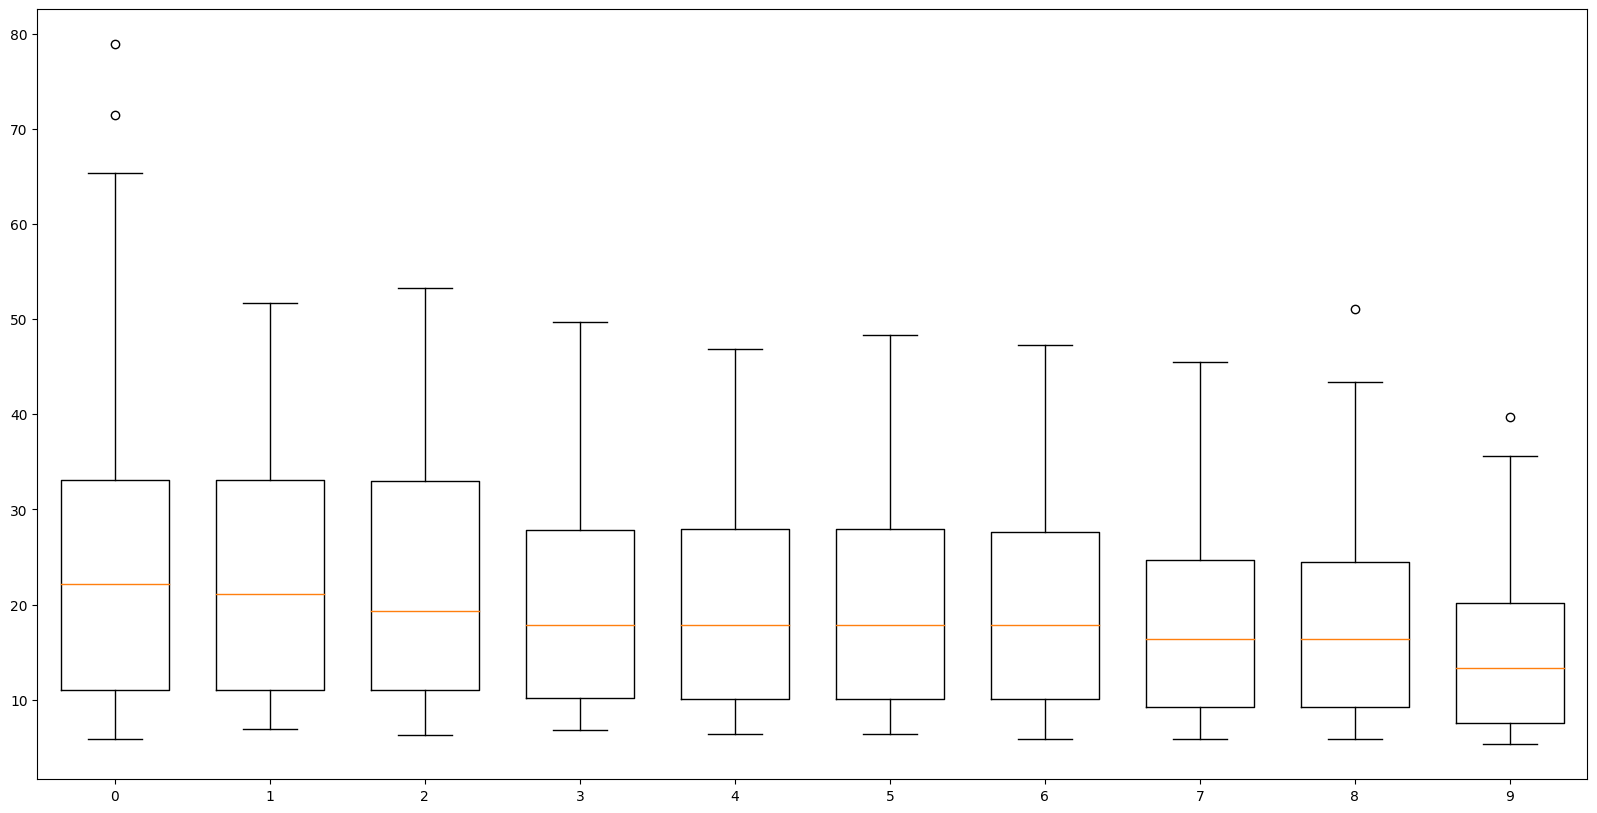

In [18]:
plt.figure(figsize=(20, 10))
for pos, tol in enumerate(tol_set):
    plt.boxplot(
        find_rows_with_specific_tolerance(data, tol)[:, -1], positions=[pos], widths=0.7
    )
plt.show()

# Boxplot for each set of repetitions

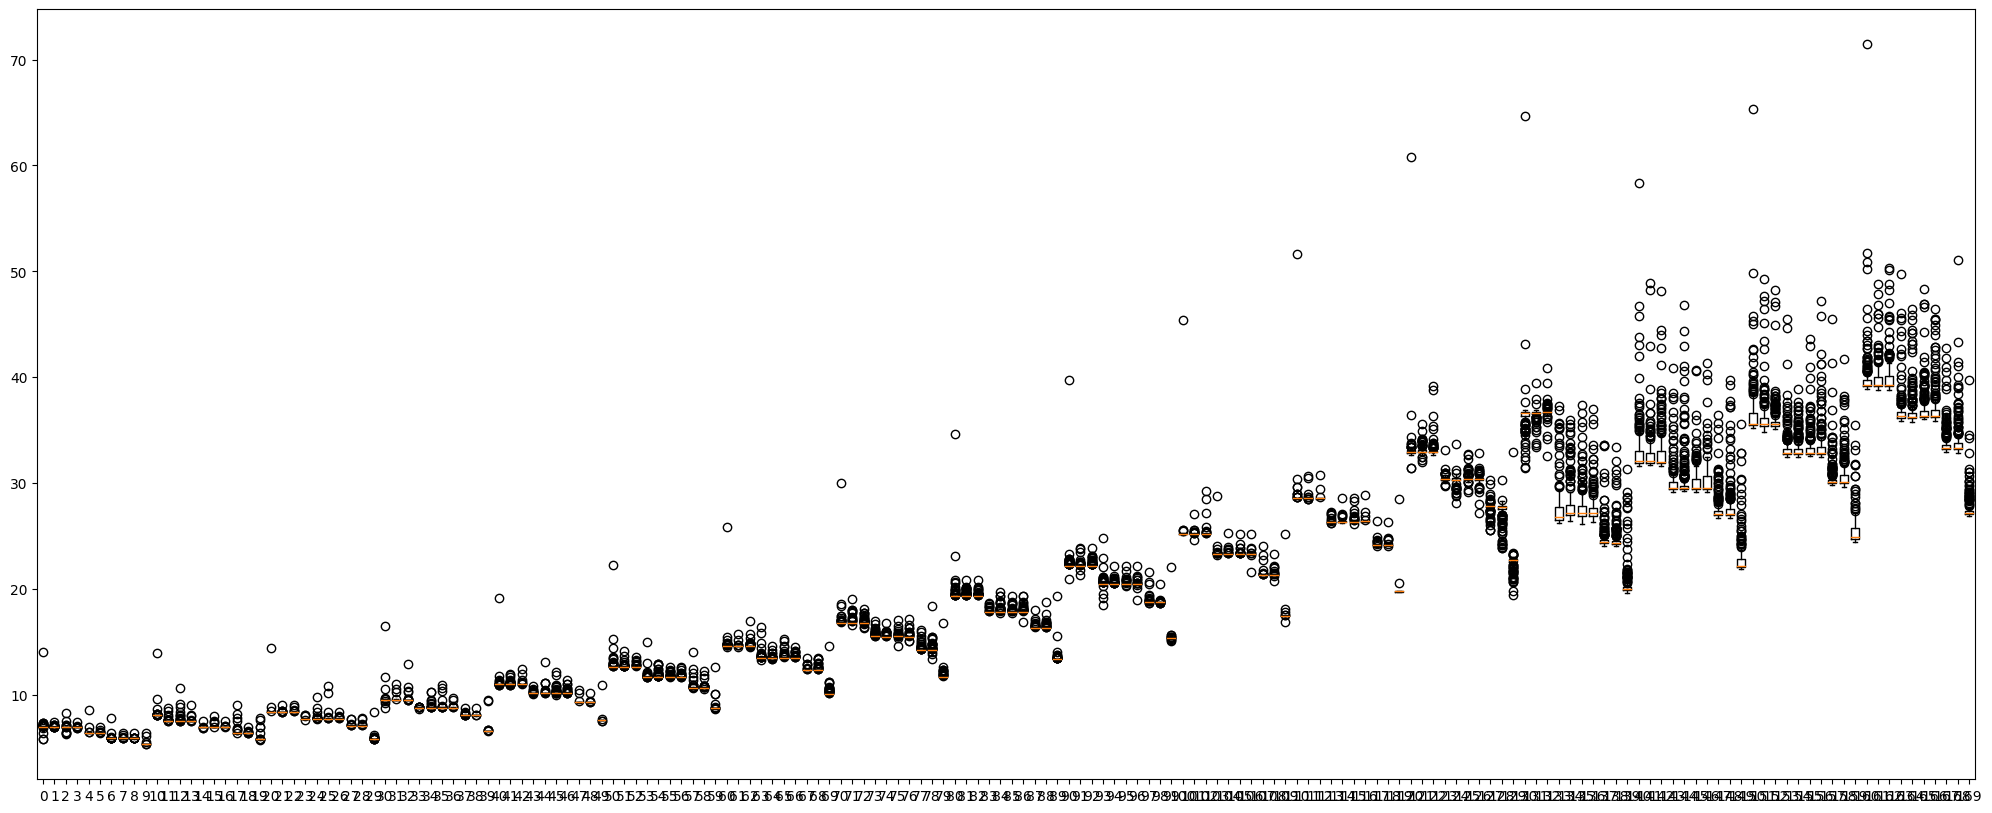

In [19]:
plt.figure(figsize=(25, 10))
count = 0
for threshold_count in range(7, 24):
    for pos, tol in enumerate(tol_set):
        parameters[9] = threshold_count
        plt.boxplot(
            find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[count], widths=0.7
        )
        count += 1
plt.show()

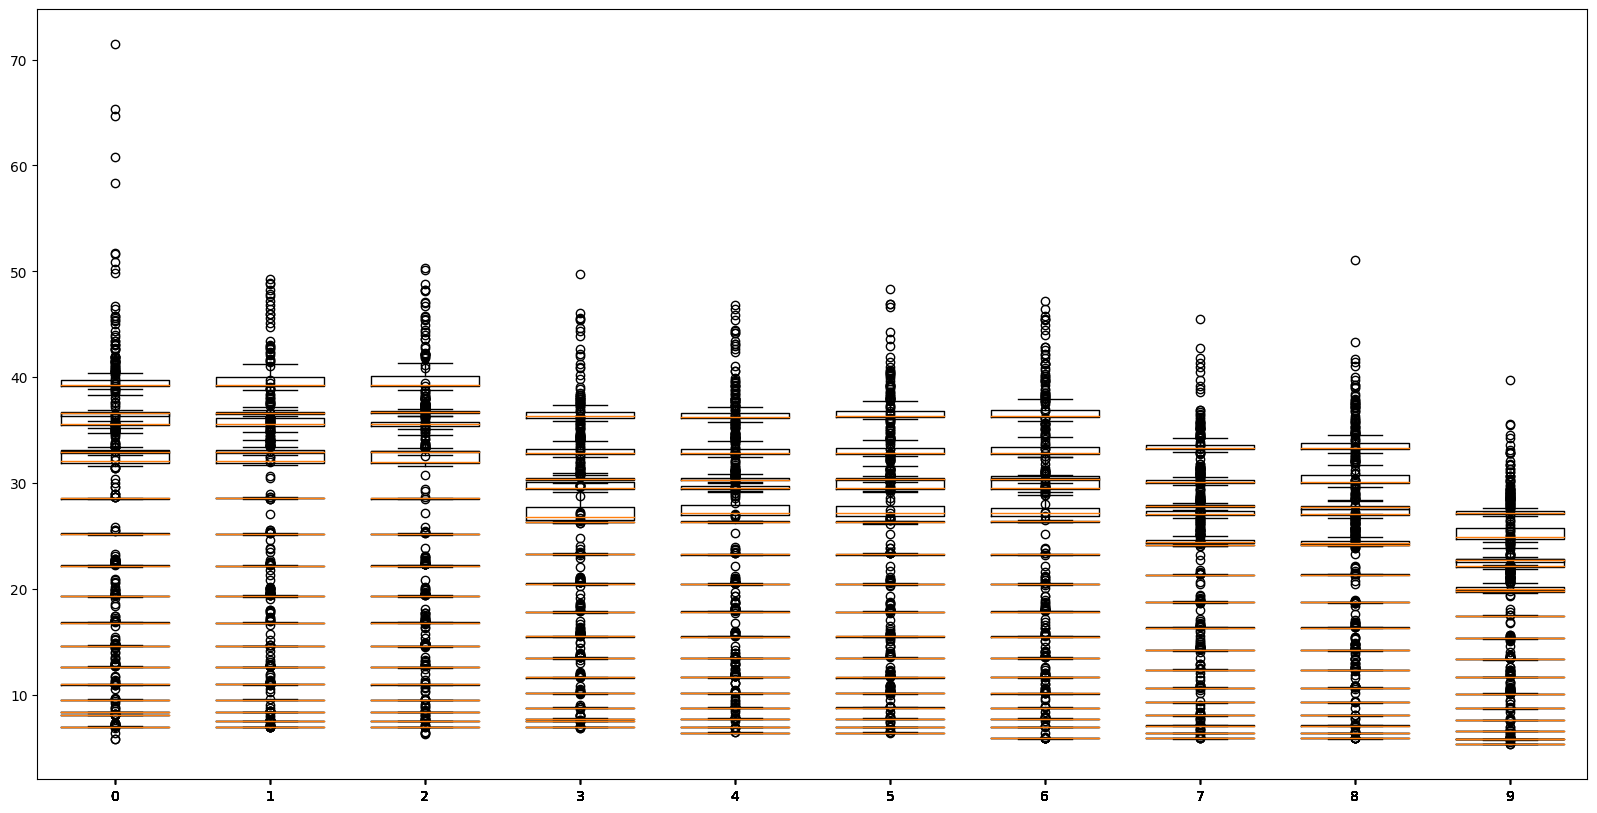

In [20]:
plt.figure(figsize=(20, 10))
for threshold_count in range(7, 24):
    for pos, tol in enumerate(tol_set):
        parameters[9] = threshold_count
        plt.boxplot(
            find_specific_rows_in_data(data, [tol] + parameters)[:, -1], positions=[pos], widths=0.7
        )
plt.show()

# Boxplot for each threshold

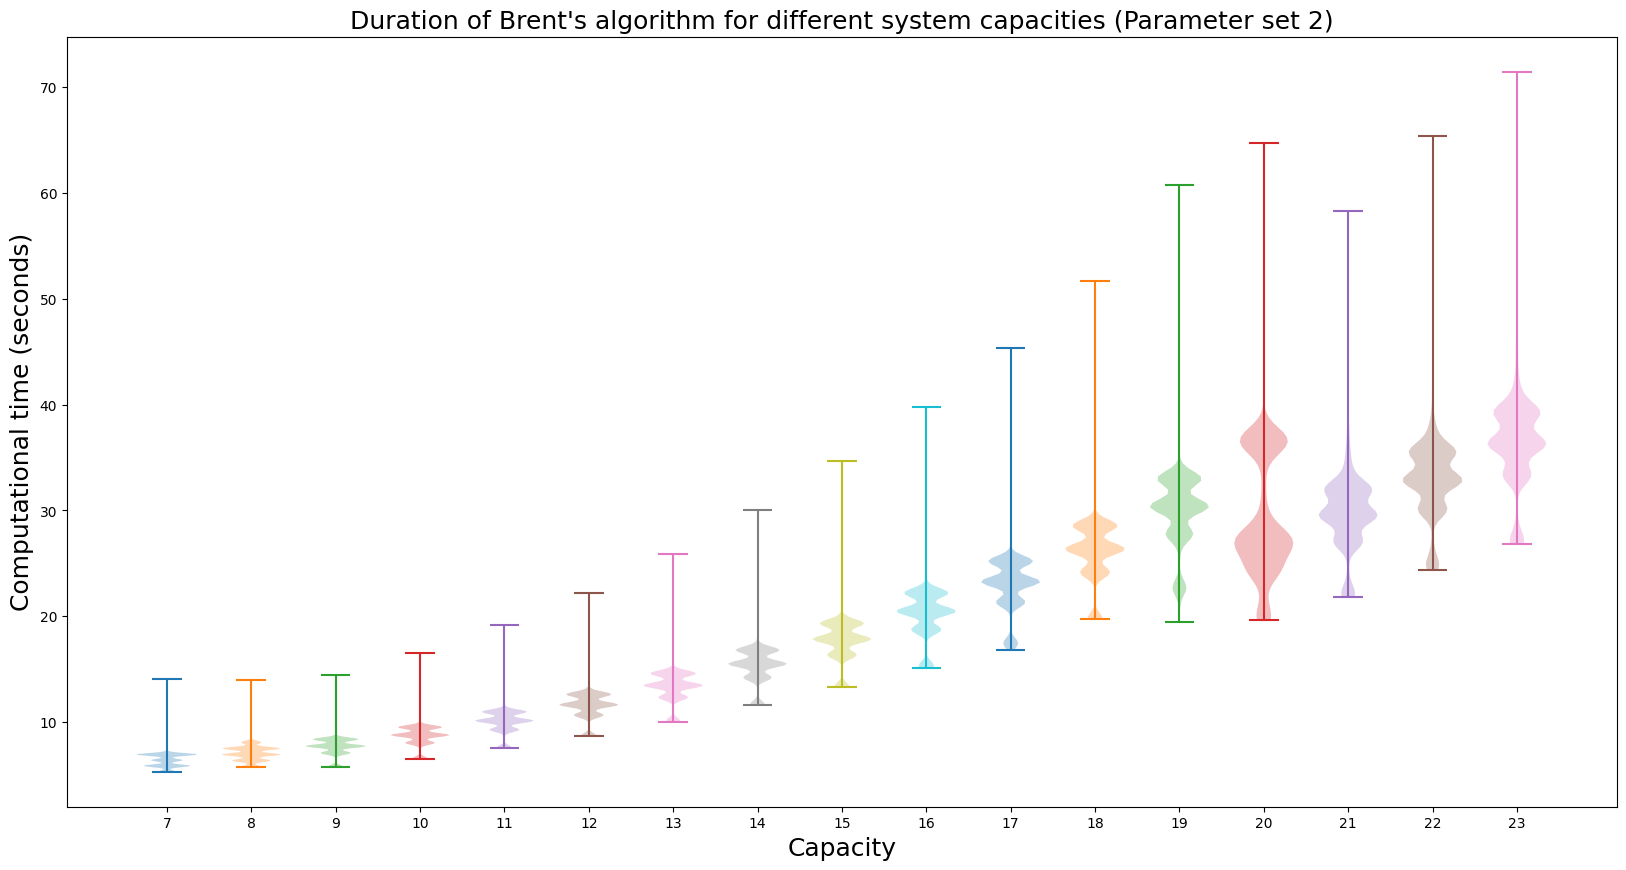

In [25]:
plt.figure(figsize=(20, 10))
parameters = [10,10,2,2,5,3,2,3,4,_,15,7,10]
system_capacity_set = list(range(7, 24))
for pos, thres in enumerate(system_capacity_set):
    parameters[9] = thres
    plt.violinplot(
        find_specific_rows_in_data(data, parameters, start=2)[:, -1], positions=[pos + 7], widths=0.7
    )
    plt.xticks(system_capacity_set, system_capacity_set)
    plt.xlabel("Capacity", fontsize=18)
    plt.ylabel("Computational time (seconds)", fontsize=18)
    plt.title("Duration of Brent's algorithm for different system capacities (Parameter set 2)", fontsize=18)
plt.savefig("tolerance_violinplots_2.pdf");

# Lineplot for each threshold and each set of repetitions

In [22]:
system_capacity_set = list(range(7, 24))
tol_set = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
parameters = [10,10,2,2,5,3,2,3,4,_,15,7,10]

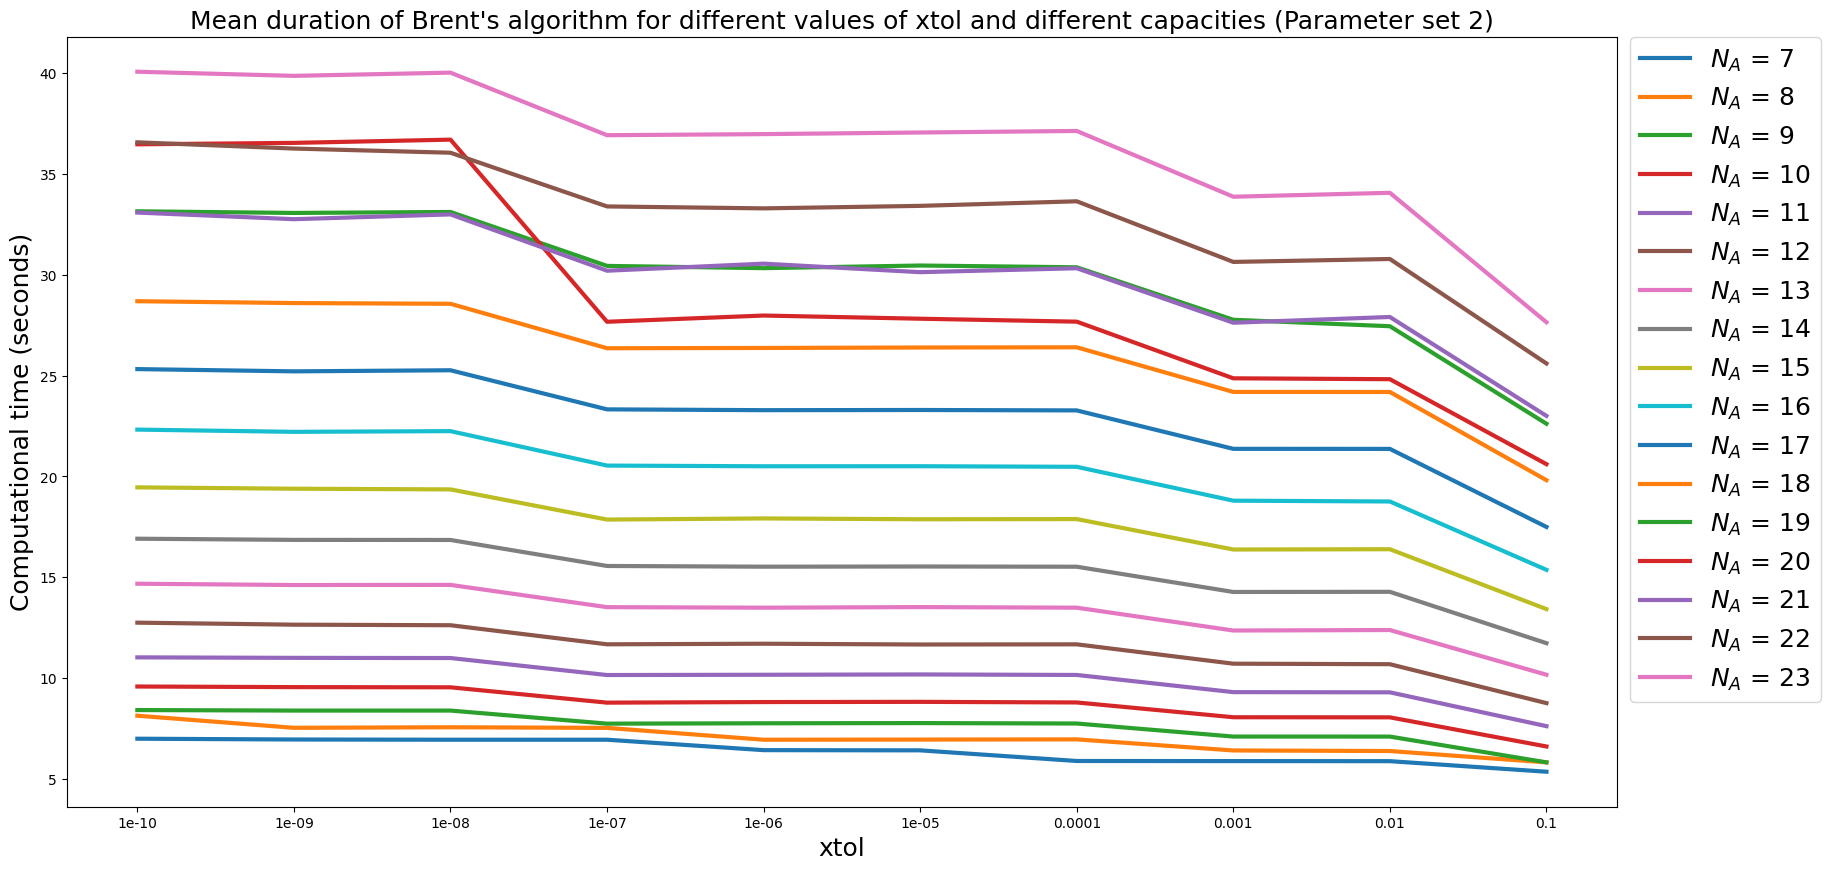

In [24]:
plt.figure(figsize=(20, 10))
for N_count in system_capacity_set:
    plot_list = []
    parameters[9] = N_count
    for tol in tol_set:
        plot_list.append(np.mean(find_specific_rows_in_data(data, [tol] + parameters)[:, -1]))
    plt.plot(plot_list, label=f"$N_A$ = {N_count}", linewidth=3)
    plt.xticks(range(len(tol_set)), tol_set)
plt.xlabel("xtol", fontsize=18)
plt.ylabel("Computational time (seconds)", fontsize=18)
plt.title(
    "Mean duration of Brent's algorithm for different values of xtol and different capacities (Parameter set 2)",
    fontsize=18
)
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper center', borderaxespad=0, fontsize=18)
plt.savefig("tolerance_lineplots_2.pdf");